Dataset loaded: data.csv

Shape: (1000, 20)

Columns: ['Temperature', 'Fever_Severity', 'Age', 'Gender', 'BMI', 'Headache', 'Body_Ache', 'Fatigue', 'Chronic_Conditions', 'Allergies', 'Smoking_History', 'Alcohol_Consumption', 'Humidity', 'AQI', 'Physical_Activity', 'Diet_Type', 'Heart_Rate', 'Blood_Pressure', 'Previous_Medication', 'Recommended_Medication']


,Temperature,Fever_Severity,Age,Gender,BMI,Headache,Body_Ache,Fatigue,Chronic_Conditions,Allergies,Smoking_History,Alcohol_Consumption,Humidity,AQI,Physical_Activity,Diet_Type,Heart_Rate,Blood_Pressure,Previous_Medication,Recommended_Medication
0,36.1,Normal,89,Female,24.0,No,Yes,No,No,Yes,No,Yes,81.4,430,Moderate,Vegan,72,Normal,NaN,Ibuprofen
1,37.5,Mild Fever,94,Male,26.6,No,No,No,Yes,No,Yes,Yes,44.4,10,Active,Vegetarian,62,High,Ibuprofen,Paracetamol
2,36.4,Normal,92,Male,27.8,No,No,No,No,No,No,Yes,73.7,400,Sedentary,Vegan,85,High,NaN,Ibuprofen
3,39.8,High Fever,66,Male,18.7,No,Yes,No,No,No,No,No,44.1,438,Active,Non-Vegetarian,96,High,Ibuprofen,Ibuprofen
4,39.3,High Fever,28,Male,21.0,No,Yes,No,Yes,Yes,Yes,Yes,65.9,451,Active,Vegetarian,85,Low,Paracetamol,Ibuprofen



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Temperature             1000 non-null   float64
 1   Fever_Severity          1000 non-null   object 
 2   Age                     1000 non-null   int64  
 3   Gender                  1000 non-null   object 
 4   BMI                     1000 non-null   float64
 5   Headache                1000 non-null   object 
 6   Body_Ache               1000 non-null   object 
 7   Fatigue                 1000 non-null   object 
 8   Chronic_Conditions      1000 non-null   object 
 9   Allergies               1000 non-null   object 
 10  Smoking_History         1000 non-null   object 
 11  Alcohol_Consumption     1000 non-null   object 
 12  Humidity                1000 non-null   float64
 13  AQI                     1000 non-null   int64  
 14  Physical_Activity       10

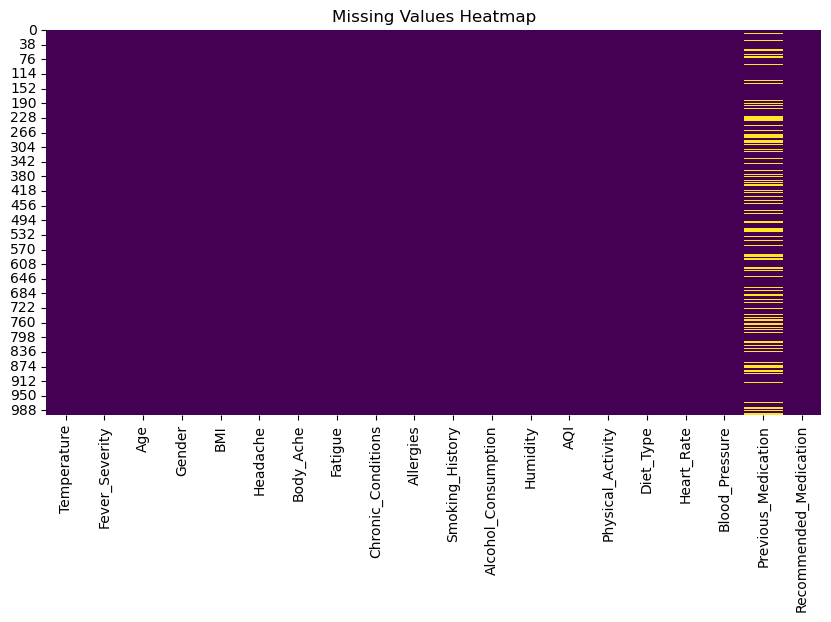

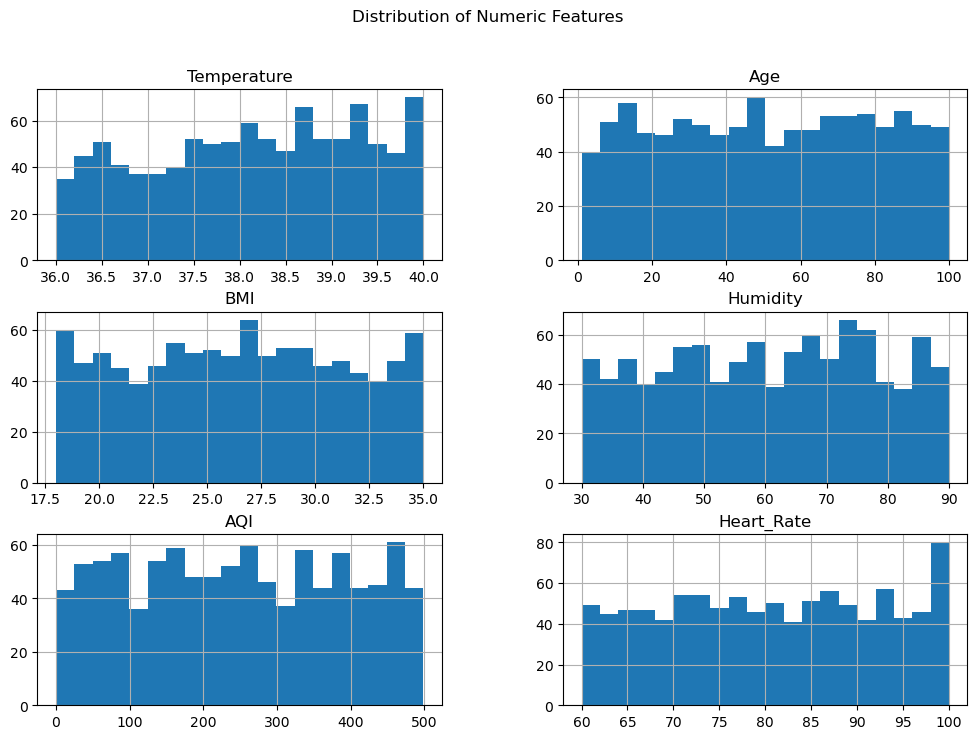

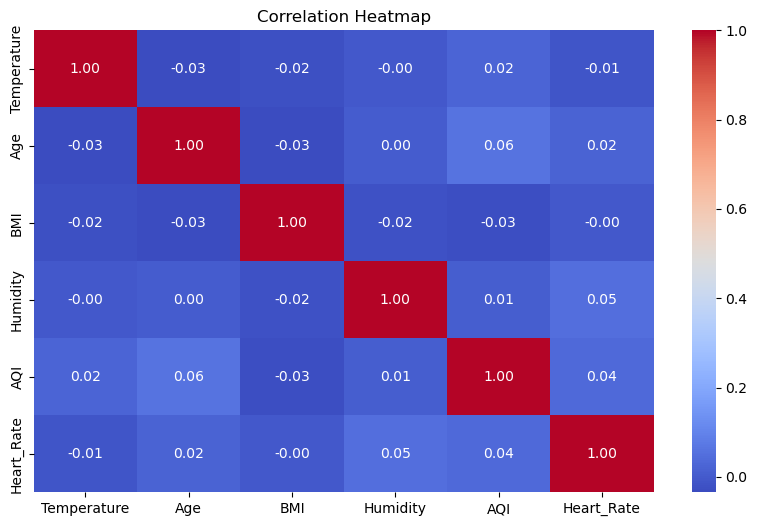

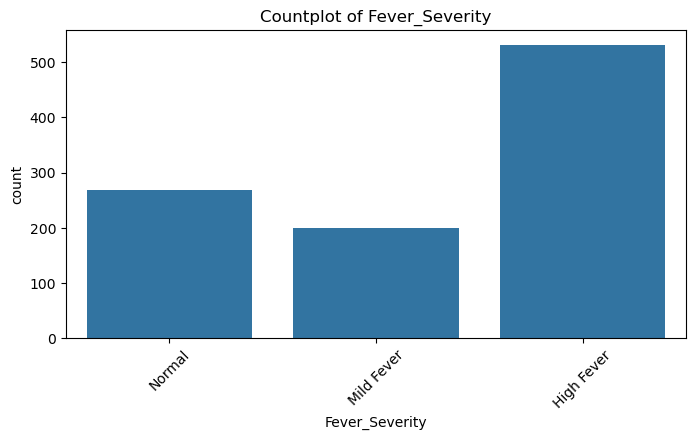

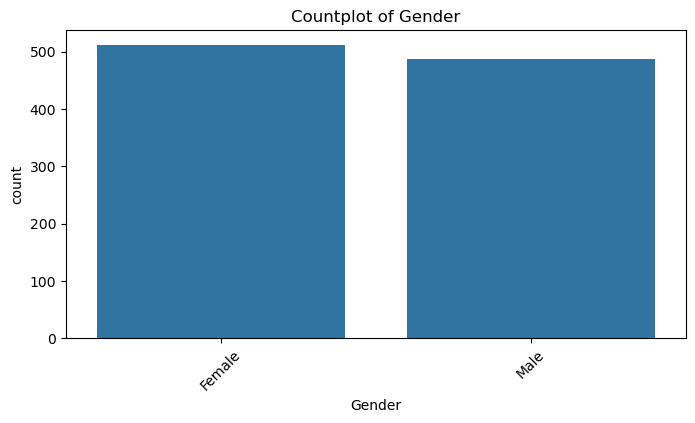

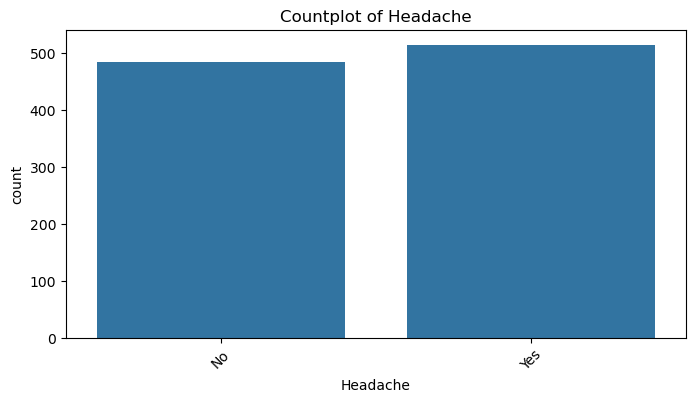

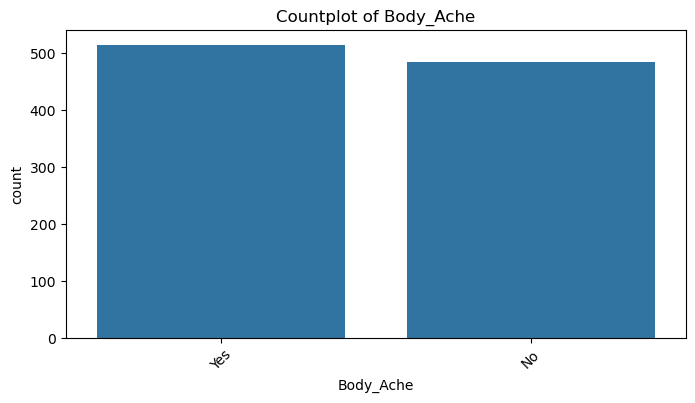

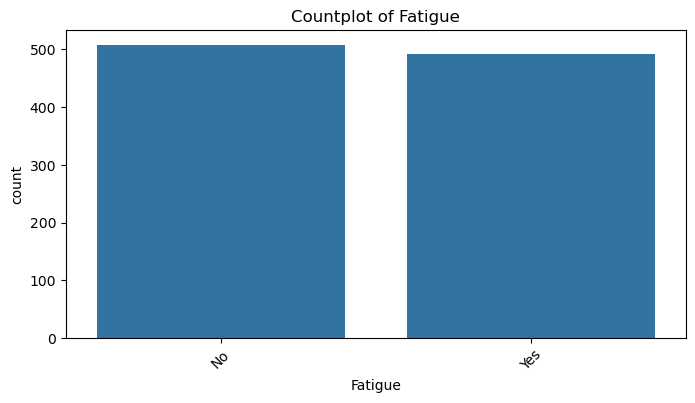

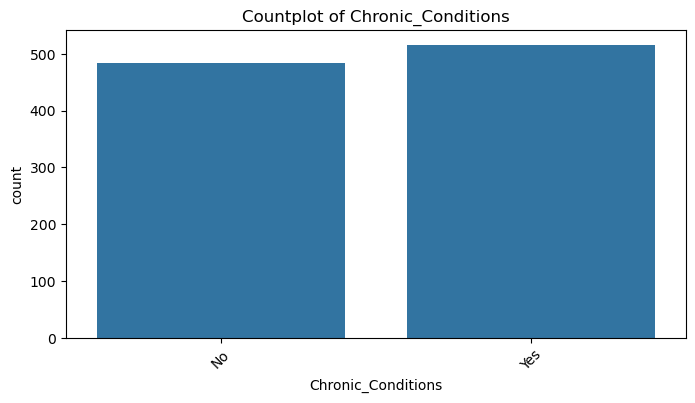

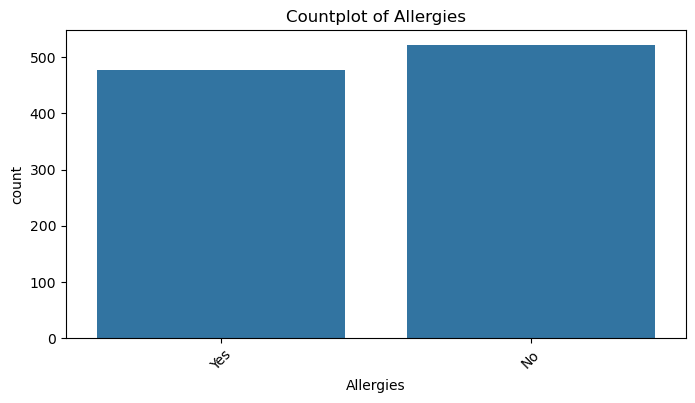

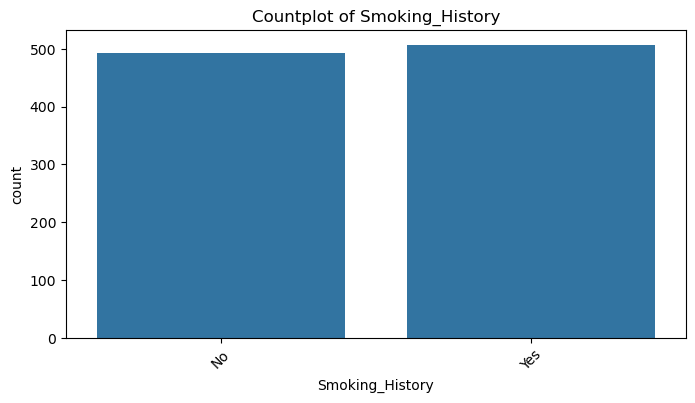

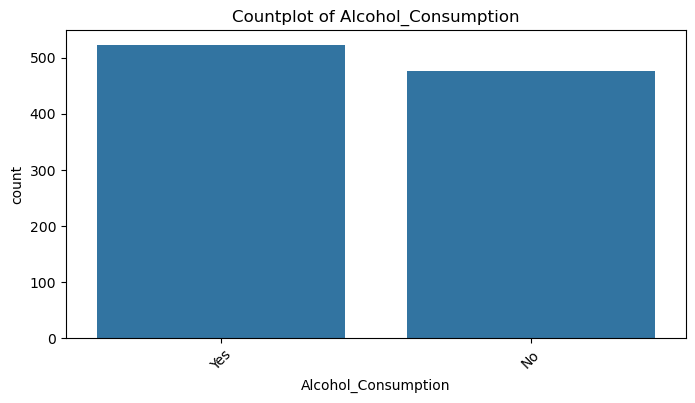

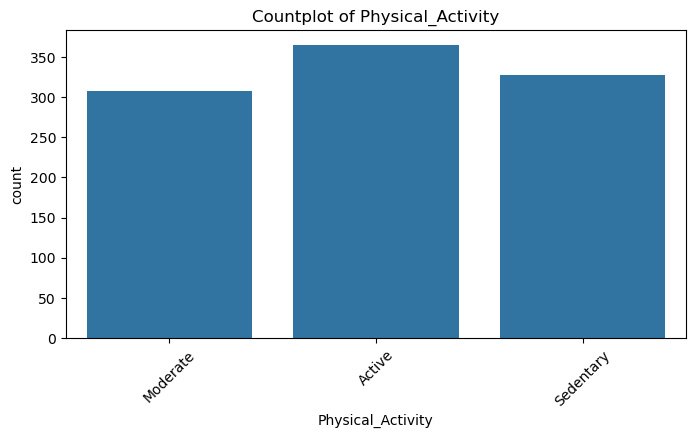

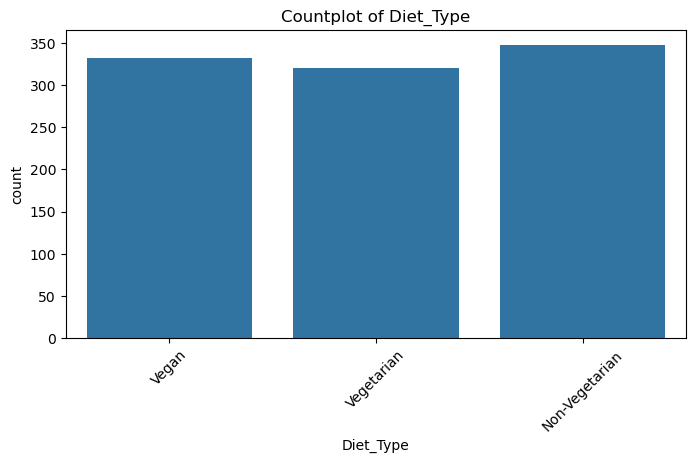

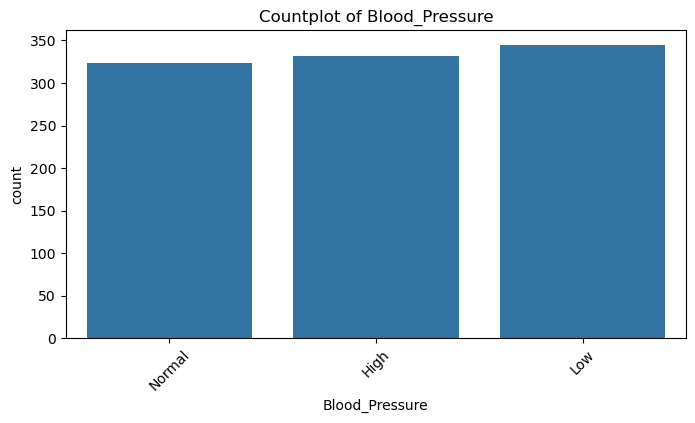

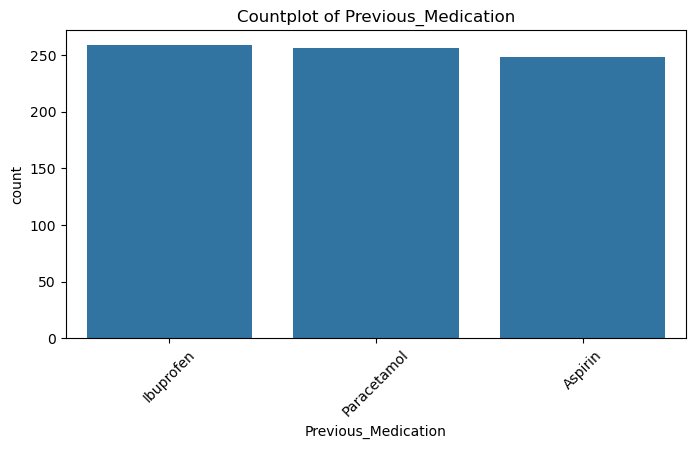

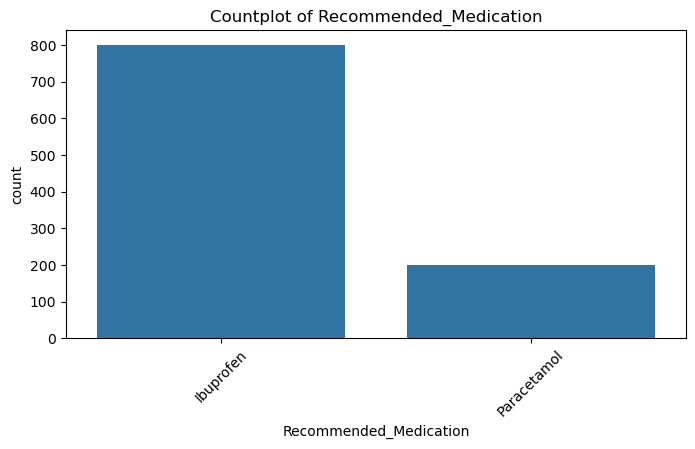

In [16]:

# 1.Import libraries

import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 2.Load dataset

raw_path = "../data/raw"
file = [f for f in os.listdir(raw_path) if f.endswith(".csv")][0]
data = pd.read_csv(os.path.join(raw_path, file))

print("Dataset loaded:", file)
print("\nShape:", data.shape)
print("\nColumns:", data.columns.tolist())


# 3. Preview dataset
display(data.head())

# 4 Basic info

print("\nDataset Info:")
print(data.info())

print("\nMissing Values:")
print(data.isnull().sum())

print("\nSummary Statistics:")
print(data.describe(include="all"))

# 5.Visualizations

# Missing values heatmap
plt.figure(figsize=(10,5))
sns.heatmap(data.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()

# Distribution of numeric features
num_cols = data.select_dtypes(include=["int64", "float64"]).columns
data[num_cols].hist(figsize=(12, 8), bins=20)
plt.suptitle("Distribution of Numeric Features")
plt.show()

# Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(data[num_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# Categorical variable counts
cat_cols = data.select_dtypes(include=["object"]).columns
for col in cat_cols:
    plt.figure(figsize=(8,4))
    sns.countplot(data=data, x=col)
    plt.title(f"Countplot of {col}")
    plt.xticks(rotation=45)
    plt.show()



Some Basic Insights drawn from the data

1.The data has 20 unique columns and  1000 rows

2.Amost all the  categorical features have  balanced distribution according to the count plots.
The target column  is highly imbalanced with ibuprofen having   801 entries and paracetamol having 199 entries.

3.'Previous_Medication' has  237  missing values.

4.All other columns have no missing  values except the 'Previous_Medication'

5.The  numerical columns are pooly related  as shown by  the correlation heatmap  with the highest correlation being   6%(Age and AQI)

In [17]:
print(data["Recommended_Medication"].value_counts())

Recommended_Medication
Ibuprofen      801
Paracetamol    199
Name: count, dtype: int64


In [18]:

# Select only categorical/object columns
categorical_cols = data.select_dtypes(include=['object']).columns

print("Categorical columns found:", list(categorical_cols))
print("="*50)

#Loop through each categorical column and print its unique values
for col in categorical_cols:
    print(f"{col} -> Unique values:")
    print(data[col].unique())
    print("-"*50)


Categorical columns found: ['Fever_Severity', 'Gender', 'Headache', 'Body_Ache', 'Fatigue', 'Chronic_Conditions', 'Allergies', 'Smoking_History', 'Alcohol_Consumption', 'Physical_Activity', 'Diet_Type', 'Blood_Pressure', 'Previous_Medication', 'Recommended_Medication']
Fever_Severity -> Unique values:
['Normal' 'Mild Fever' 'High Fever']
--------------------------------------------------
Gender -> Unique values:
['Female' 'Male']
--------------------------------------------------
Headache -> Unique values:
['No' 'Yes']
--------------------------------------------------
Body_Ache -> Unique values:
['Yes' 'No']
--------------------------------------------------
Fatigue -> Unique values:
['No' 'Yes']
--------------------------------------------------
Chronic_Conditions -> Unique values:
['No' 'Yes']
--------------------------------------------------
Allergies -> Unique values:
['Yes' 'No']
--------------------------------------------------
Smoking_History -> Unique values:
['No' 'Yes']
--